In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
df_can.head()

In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


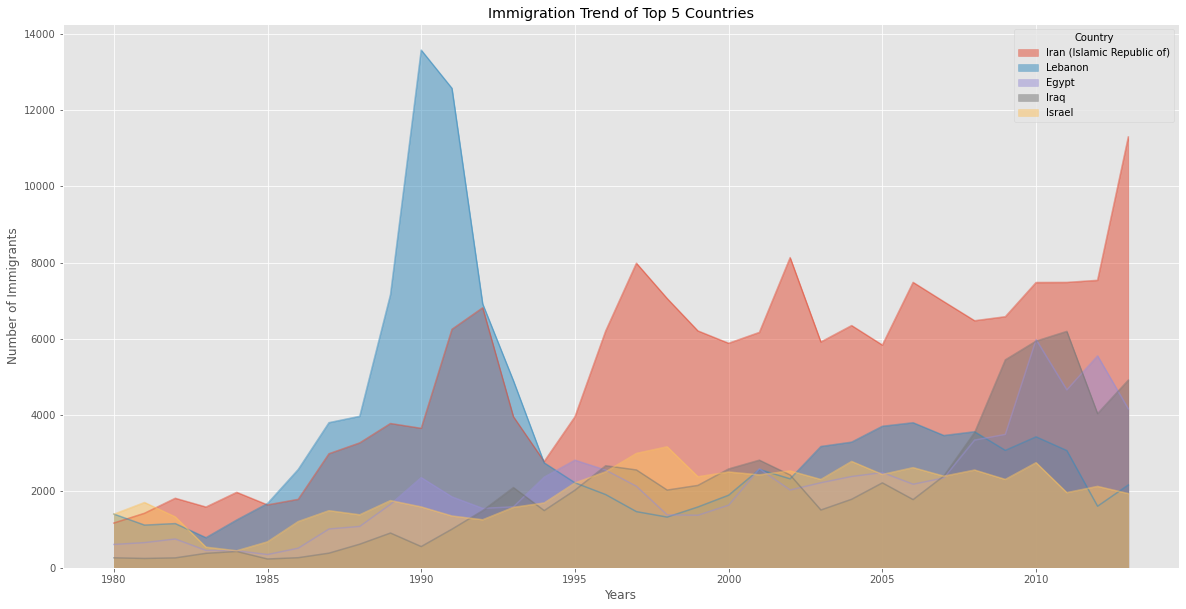

In [259]:
middle_est=['Bahrain','Cyprus','Egypt','Iran (Islamic Republic of)','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','State of Palestine','Qatar','Saudi Arabia','Syrian Arab Republic','Turkey','United Arab Emirates','Yemen']
df_middle=df_can.loc[middle_est,:]
#
df_middle.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_middle.head()
years = list(map(str, range(1980, 2014)))
df_top5 = df_top5[years].transpose()
# plot
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

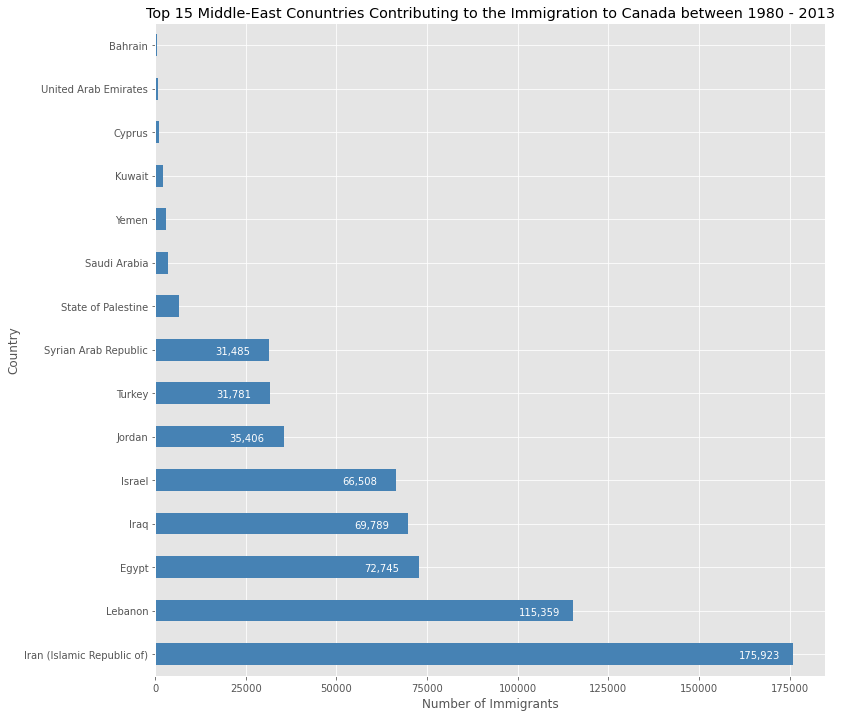

In [268]:
df_can.sort_values(by='Total', ascending=False, inplace=True)

# get top 15 countries
df_middle_15 = df_middle['Total'].head(15)
df_middle_15
# generate plot
df_middle_15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Middle-East Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate
for index, value in enumerate(df_middle_15): 
    label =format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 15000, index- 0.10 ), color='white')

plt.show()

#### Even I as a guy born and raised in Middle East, I never belived that the 3 three top contries are Iran, Lebanon and Egypt if I did not see this chart!!!
##### That's why I love data science!!

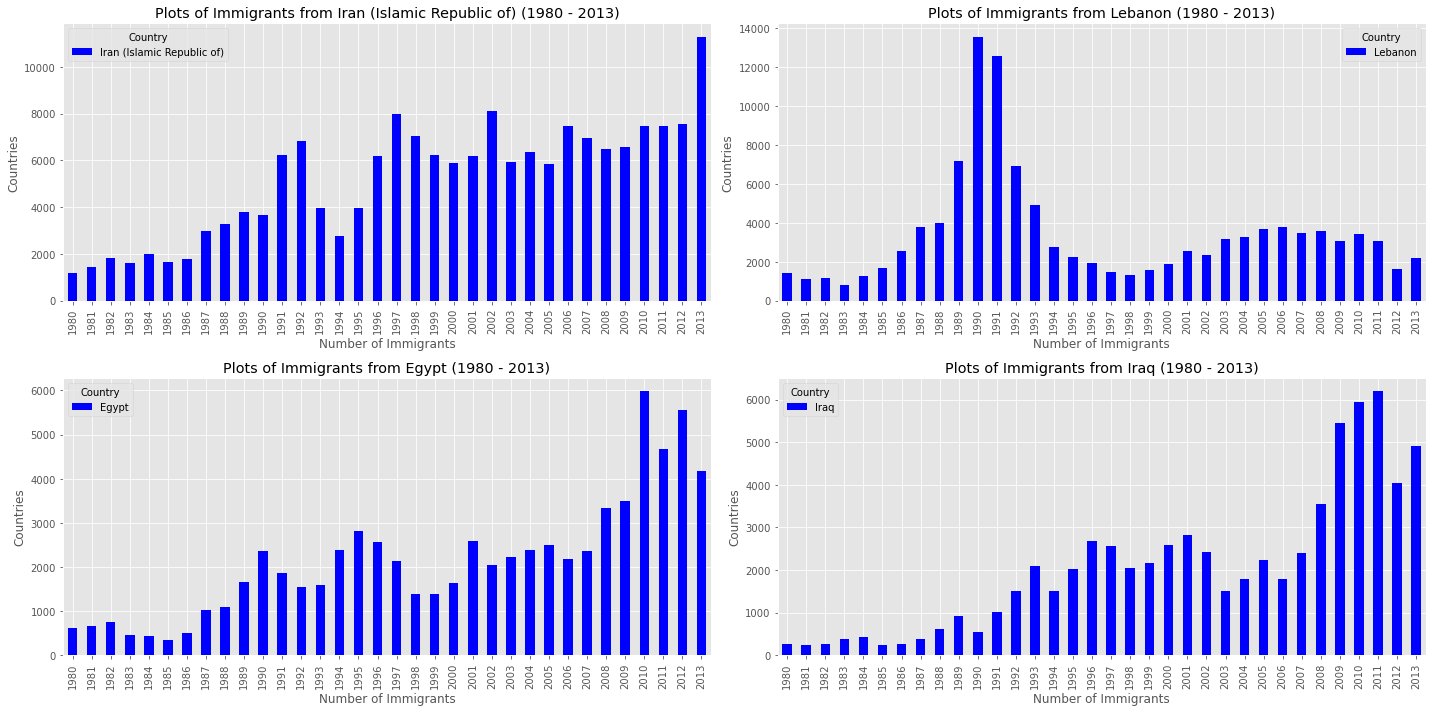

In [270]:
fig = plt.figure() # create figure
country=['Iran (Islamic Republic of)','Lebanon','Egypt','Iraq']

for i,con in enumerate(country):
    ax[i]=fig.add_subplot(2, 2, i+1)
    df_i=df_can.loc[[country[i]],years].T
    df_i.plot(kind='bar', figsize=(20, 10), ax=ax[i],color='blue') 
    ax[i].set_title('Plots of Immigrants from {} (1980 - 2013)'.format(con))
    ax[i].set_xlabel('Number of Immigrants')
    ax[i].set_ylabel('Countries')

fig.tight_layout()
plt.show()

##### Clearly it can be seen that the immigration from Iran, Egypt and Iraq  to Canda has been increasing since 1980, while that remained constant for Lebanon from beginning of 1990's.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

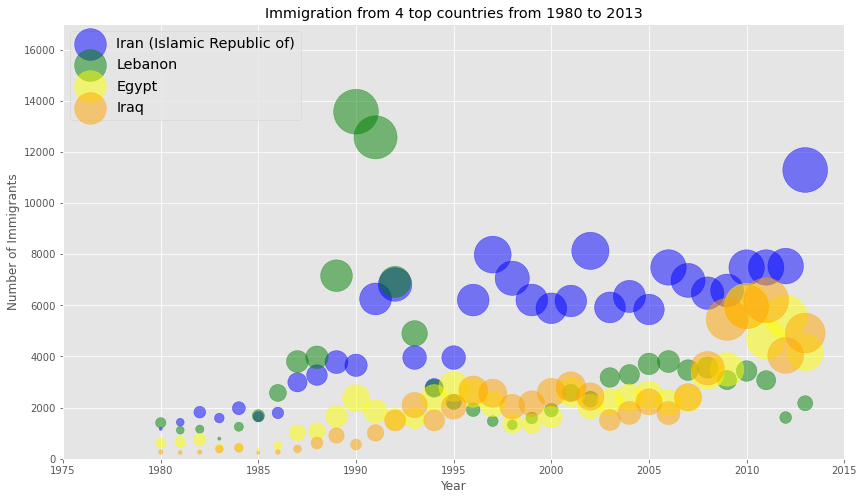

In [273]:
fig = plt.figure() # create figure
country=['Iran (Islamic Republic of)','Lebanon','Egypt','Iraq']
color=['blue','green','yellow','orange']
norm={}
for i,con in enumerate(country):
    
    df_i = df_can[years].transpose()

    # cast the Years (the index) to type int
    df_i.index = map(int, df_i.index)

    # let's label the index. This will automatically be the column name when we reset the index
    df_i.index.name = 'Year'

    # reset index to bring the Year in as a column
    df_i.reset_index(inplace=True)
        # normalize Brazil data
    norm[i] = (df_i[con] - df_i[con].min()) / (df_i[con].max() - df_i[con].min())
    if i==0:
        ax[i] = df_i.plot(kind='scatter',
                        x='Year',
                        y=con,
                        figsize=(14, 8),
                        alpha=0.5,  # transparency
                        color=color[i],
                        s=norm[i] * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015),ylim=(0,17000),
                        )
    else:
           ax[i] = df_i.plot(kind='scatter',
                    x='Year',
                    y=con,
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color=color[i],
                    s=norm[i] * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015),ax=ax[i-1]
                    )
    
    
ax[0].set_ylabel('Number of Immigrants')
ax[0].set_title('Immigration from 4 top countries from 1980 to 2013')
ax[0].legend(['Iran (Islamic Republic of)','Lebanon','Egypt','Iraq'], loc='upper left', fontsize='x-large')   

#### The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data.

In [238]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

In [274]:
df_middle4=df_can.loc[['Iran (Islamic Republic of)','Lebanon','Egypt','Iraq'],:]

In [275]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    total_num_tiles = width * height 
#     print ('Total number of tiles is', total_num_tiles)
    
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_middle4.index.values[i] + ': ' + str(tiles))
    
    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1       
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show();
 

Iran (Islamic Republic of): 162
Lebanon: 106
Egypt: 67
Iraq: 64


<Figure size 432x288 with 0 Axes>

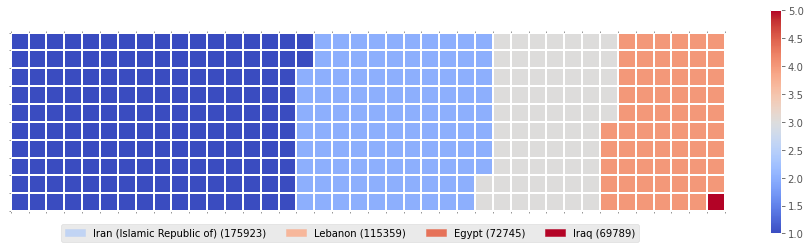

In [276]:
width = 40 
height = 10 
categories = df_middle4.index.values 
values = df_middle4['Total'] 
colormap = plt.cm.coolwarm

create_waffle_chart(categories, values, height, width, colormap);

#### Now, considering waffle chart, we can clearly see that Iran has had largest number of immigrants to Canada in last three decades. This shows that contribution of the Iran is almost the same as the rest of three countries in total!